# Machine Learning, Excercise 3

* Attila Lazar 0026842
* Bogdan

In [2]:
import os
os.getcwd()
import matplotlib.pyplot as plt
os.chdir('/home/lazafi/labor/ml-2019/male2019/3/src/fruits')
os.getcwd()

import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from PIL import Image
from glob import glob
import csv
import seaborn as sn
import pandas as pd

#from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from helper import *



## Feature Variables

### Pixel Data

Images are read as 3-tupples of color values raging from 0 to 255. We use cv2 library for reading images and to convert them in rgb arrays.

The reading of the Images is hidden in the Class FIDS30DataSet, we only pass the absolute root directory. For demonstration purposes we can also limit the number of classes and number of images per class.

In [2]:
# read is limited to 2 files from 2 subdirecories
fruit2data = FIDS30DataSet("/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30", limit=2)


 category strawberries 2
 category apples 2


### Histogram

From the pixel data we extracted color histograms. For the color images we count the occurances for each 256 colors in each of the 3 channels seperatelly and concat them to a long histogram of 768 colors. We also provide the option to reduce the histogram to the given amount of bins.


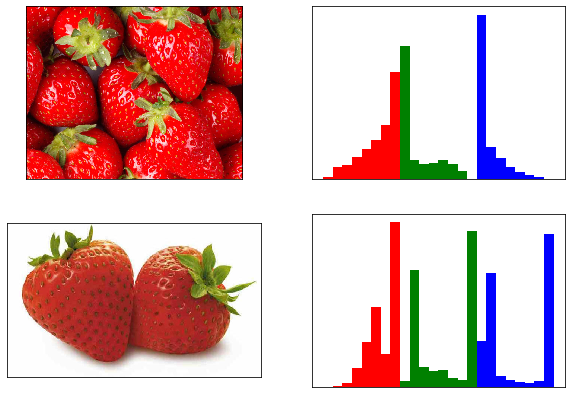

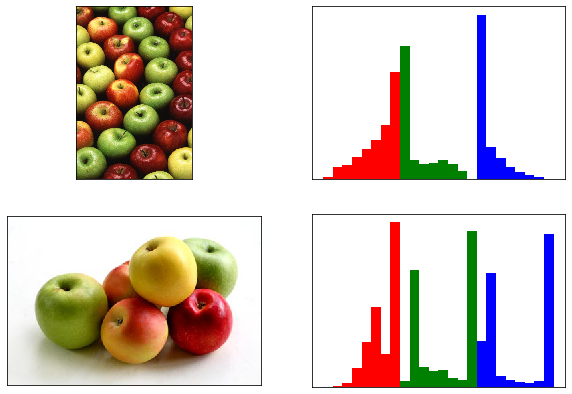

In [3]:
# we only use 10 bins per color channel
fruit2data.resetFeatures()
fruit2data.addFeatures(Histogram(8, debug=True))


### Visual Bag of Words

We use cv2 ORB implementation to describe features of images. First image Descriptor are extracted from all images. to reduce the amount of possible descriptors these are grouped using KMeans clustering (sklearn MiniBatchKMeans to save memory). These clustered descriptors are then counted for each image and a Histogram of the frequencies of these descriptors is used to train our 3 classifiers. 

We capsuled the code in class which we can pass to the dataset class to extract features. The parameter (10) is the amount to which the descriptors are reduced in the clustering process (number of clusters). 

In [4]:
fruit2data.resetFeatures()
fruit2data.addFeatures(BOV(10, debug = False))

## Classifiers

We used following classifiers from the sklearn library:

* Support Vector Machine Classifier
* knn Classifier
* Multi Layered Perceptron

From these "classic" classification methods we expect to achive our baseline performace. Then we will try to surpass this witch an deep convolutional neural network classifier setup. 


## Evaluation

For each experiment we divided our dataset in 67% training and 33% test images. For training we used the training set.

After training the model we used it on the test images to predict their class and computed the *confusion matrix* to visually inspect the accuracy of the classification. Additionaly we also use macro-averaged precission to compare between classifiers.

The code for evaluation is enclosed in the Experiment class method evaluate(). It can display confusion-matrix and print a detailed report about per class and overall accuracy. 

## FIDS30 Fruits Dataset

We used the FIDS30 dataset provided by the lecture. It consists of 30 directories containing ap. 30 images of one fruit.


### Historgam features


As a first experiment we extract Histogram Data from the Images and train different classifiers on this data to predict the kind of the fruit. 

In [4]:
# prepare the fids30 dataset with histogram features
fids30_data = FIDS30DataSet("/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30")
fids30_data.addFeatures(Histogram(8))
print(fids30_data.count)

 category strawberries 46
 category apples 38
 category raspberries 39
 category mangos 34
 category avocados 26
 category coconuts 26
 category apricots 30
 category grapefruits 31
 category watermelons 31
 category plums 31
 category peaches 27
 category grapes 38
 category kiwifruit 36
 category lemons 29
 category passionfruit 22
 category blackberries 37
 category cherries 33
 category figs 26
 category bananas 42
 category acerolas 24
 category guava 33
 category olives 23
 category blueberries 32
 category cantaloupes 31
 category oranges 35
 category limes 29
 category tomatoes 46
 category pears 32
 category pineapples 34
 category pomegranates 30
971


In [6]:
print(fids30_data.labels)

['strawberries', 'apples', 'raspberries', 'mangos', 'avocados', 'coconuts', 'apricots', 'grapefruits', 'watermelons', 'plums', 'peaches', 'grapes', 'kiwifruit', 'lemons', 'passionfruit', 'blackberries', 'cherries', 'figs', 'bananas', 'acerolas', 'guava', 'olives', 'blueberries', 'cantaloupes', 'oranges', 'limes', 'tomatoes', 'pears', 'pineapples', 'pomegranates']


### Support Vector Machines Classifier

The SVM Classifier gave us the poorest results. For most of the test images the model failed to predict the correct class, most of images got classified as pommegranates and cheries. 

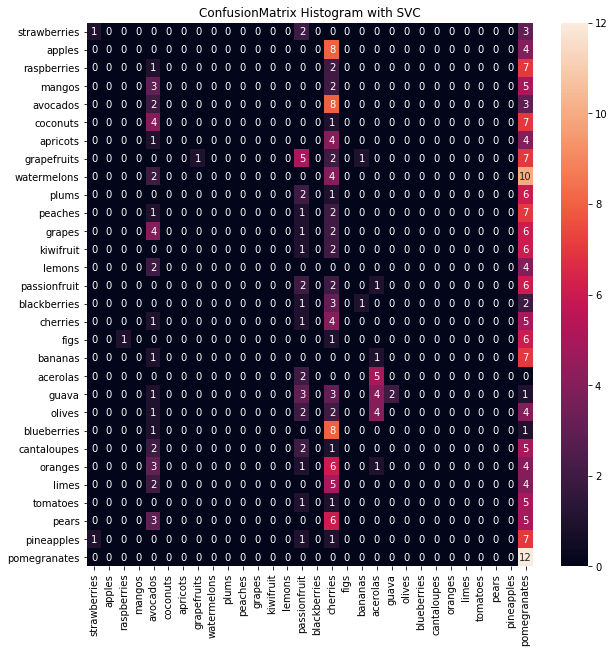

In [7]:
# svc

exp1 = Experiment(fids30_data, svm.SVC(gamma='auto'), "Histogram with SVC")
exp1.train()
exp1.evaluate(figure=True)


### k Nearest Neighbors classifier

We got better result using knn Classifier. Fruits with simular colors are most commonly missclassified: apples and cherries, watermelons and passionfruits. Some missclassifications are not as obvious like coconuts and oranges missclassified as avocados.

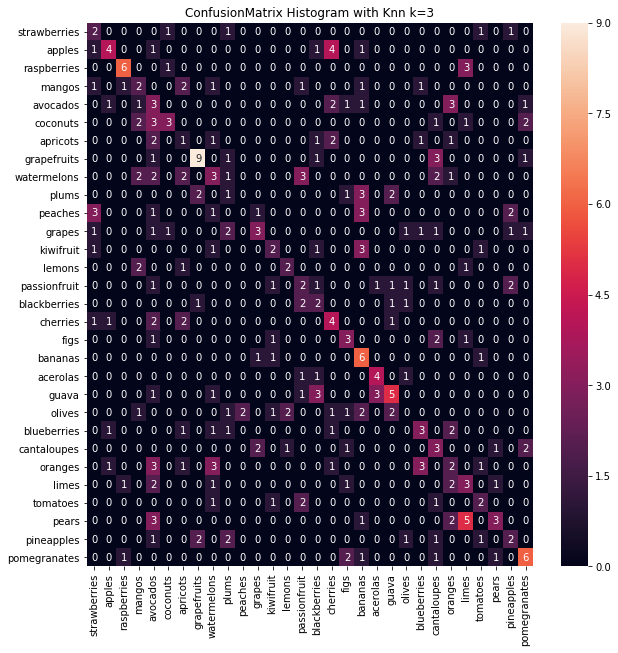

classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.50      0.33      0.40        12
           2       0.67      0.60      0.63        10
           3       0.20      0.20      0.20        10
           4       0.11      0.23      0.15        13
           5       0.50      0.25      0.33        12
           6       0.10      0.11      0.11         9
           7       0.64      0.56      0.60        16
           8       0.21      0.19      0.20        16
           9       0.10      0.11      0.11         9
          10       0.00      0.00      0.00        11
          11       0.43      0.23      0.30        13
          12       0.29      0.22      0.25         9
          13       0.40      0.33      0.36

In [8]:
# knn
exp1 = Experiment(fids30_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'),  "Histogram with Knn k=3")
exp1.train()
exp1.evaluate(figure=True, text=True)



#### diferent values for k

We tried to tune the performace with higher values for k. Different values for k only affect the precission marginaly, so we choose k=3 for better computability.

/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted 

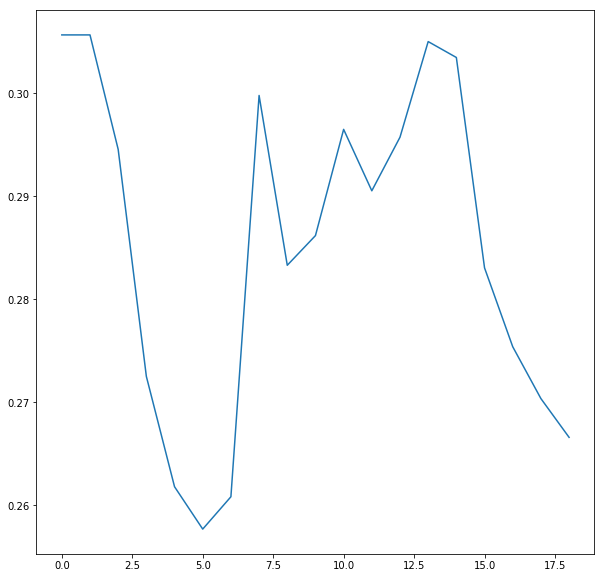

In [9]:
score = []
for k in range(1, 20):
    #print(k)
    classifier = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    classifier.fit(exp1.x_train, exp1.y_train)
    predicted = classifier.predict(exp1.x_test)
    #print(predicted)
    #print(exp1.y_test)
    score.append(metrics.precision_score(exp1.y_test, predicted, average='macro'))
plt.figure(figsize=(10,10))
plt.plot(score)
plt.show()

#### Histogram size

Histogram size has a big impact on performace. We found lower values to be much better.

8
40
72
104
136
168
200
232


/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.2945333832833833, 0.253969668675551, 0.23885822510822508, 0.2158668927690667, 0.22550550321138557, 0.23702223215381107, 0.2234536427624663, 0.18135733547498253]


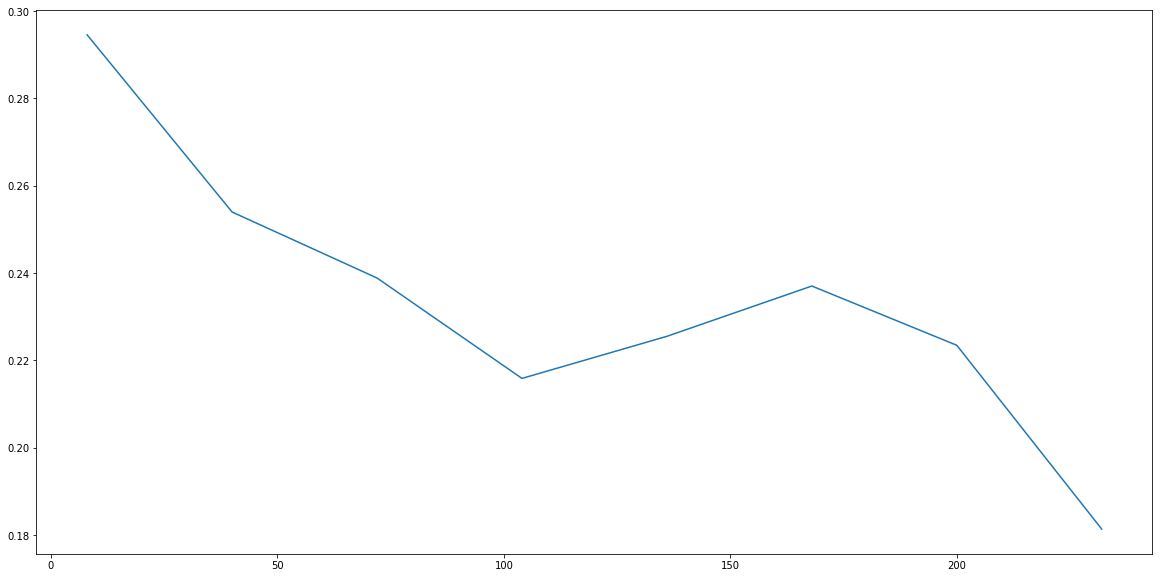

In [10]:
score = []
xrange = range(8, 264, 32)
for h in xrange:
    #print(h)
    fids30_data.resetFeatures()
    fids30_data.addFeatures(Histogram(h))
    exp = Experiment(fids30_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'),  "%d Histogram with Knn k=%d" % (h, 10))
    exp.train()
    score.append(exp.precision())
print(score)
plt.figure(figsize=(20,10))
plt.plot(xrange, score)
plt.show()

### Multi Layered Perceptron

We achived the best performace on histogram data using mlp classifier. For some fruits like grapefruits and pommegrapes the performace was about 50%. Overall 28%. 

Iteration 1, loss = 3.41347215
Iteration 2, loss = 3.34151837
Iteration 3, loss = 3.29853908
Iteration 4, loss = 3.26187248
Iteration 5, loss = 3.22694830
Iteration 6, loss = 3.19340445
Iteration 7, loss = 3.15918464
Iteration 8, loss = 3.12842368
Iteration 9, loss = 3.09569950
Iteration 10, loss = 3.06278711
Iteration 11, loss = 3.03185332
Iteration 12, loss = 3.00159486
Iteration 13, loss = 2.97127021
Iteration 14, loss = 2.93917553
Iteration 15, loss = 2.91009968
Iteration 16, loss = 2.88408261
Iteration 17, loss = 2.85476231
Iteration 18, loss = 2.82690160
Iteration 19, loss = 2.80026837
Iteration 20, loss = 2.77418002
Iteration 21, loss = 2.74579668
Iteration 22, loss = 2.72154037
Iteration 23, loss = 2.69906508
Iteration 24, loss = 2.67870255
Iteration 25, loss = 2.65384327
Iteration 26, loss = 2.62971755
Iteration 27, loss = 2.61048573
Iteration 28, loss = 2.59157581
Iteration 29, loss = 2.56750452
Iteration 30, loss = 2.54818718
Iteration 31, loss = 2.53111341
Iteration 32, los

Iteration 259, loss = 1.14246052
Iteration 260, loss = 1.14009936
Iteration 261, loss = 1.13715916
Iteration 262, loss = 1.13367111
Iteration 263, loss = 1.13106794
Iteration 264, loss = 1.12860740
Iteration 265, loss = 1.12567254
Iteration 266, loss = 1.12303324
Iteration 267, loss = 1.12062326
Iteration 268, loss = 1.11872551
Iteration 269, loss = 1.11670288
Iteration 270, loss = 1.11292897
Iteration 271, loss = 1.11050436
Iteration 272, loss = 1.10795490
Iteration 273, loss = 1.10396941
Iteration 274, loss = 1.10158886
Iteration 275, loss = 1.09939006
Iteration 276, loss = 1.09644623
Iteration 277, loss = 1.09366417
Iteration 278, loss = 1.09159602
Iteration 279, loss = 1.08812557
Iteration 280, loss = 1.08570264
Iteration 281, loss = 1.08426695
Iteration 282, loss = 1.08195488
Iteration 283, loss = 1.07915412
Iteration 284, loss = 1.07697209
Iteration 285, loss = 1.07344537
Iteration 286, loss = 1.07034434
Iteration 287, loss = 1.06828575
Iteration 288, loss = 1.06583309
Iteration 

Iteration 512, loss = 0.68035599
Iteration 513, loss = 0.67945709
Iteration 514, loss = 0.67824288
Iteration 515, loss = 0.67712413
Iteration 516, loss = 0.67668592
Iteration 517, loss = 0.67545935
Iteration 518, loss = 0.67358384
Iteration 519, loss = 0.67246415
Iteration 520, loss = 0.67143481
Iteration 521, loss = 0.66993010
Iteration 522, loss = 0.66962782
Iteration 523, loss = 0.66835742
Iteration 524, loss = 0.66795544
Iteration 525, loss = 0.66584416
Iteration 526, loss = 0.66438106
Iteration 527, loss = 0.66452541
Iteration 528, loss = 0.66298290
Iteration 529, loss = 0.66141957
Iteration 530, loss = 0.65988583
Iteration 531, loss = 0.65915227
Iteration 532, loss = 0.65781572
Iteration 533, loss = 0.65644896
Iteration 534, loss = 0.65515275
Iteration 535, loss = 0.65469585
Iteration 536, loss = 0.65383227
Iteration 537, loss = 0.65250014
Iteration 538, loss = 0.65214521
Iteration 539, loss = 0.65065414
Iteration 540, loss = 0.64840163
Iteration 541, loss = 0.64757534
Iteration 

Iteration 768, loss = 0.45485357
Iteration 769, loss = 0.45413688
Iteration 770, loss = 0.45382531
Iteration 771, loss = 0.45284701
Iteration 772, loss = 0.45274785
Iteration 773, loss = 0.45225308
Iteration 774, loss = 0.45171740
Iteration 775, loss = 0.45020372
Iteration 776, loss = 0.44921454
Iteration 777, loss = 0.44821901
Iteration 778, loss = 0.44771312
Iteration 779, loss = 0.44710988
Iteration 780, loss = 0.44651859
Iteration 781, loss = 0.44567555
Iteration 782, loss = 0.44513999
Iteration 783, loss = 0.44443435
Iteration 784, loss = 0.44389000
Iteration 785, loss = 0.44255712
Iteration 786, loss = 0.44249855
Iteration 787, loss = 0.44188328
Iteration 788, loss = 0.44127963
Iteration 789, loss = 0.44065088
Iteration 790, loss = 0.44019716
Iteration 791, loss = 0.43933531
Iteration 792, loss = 0.43856937
Iteration 793, loss = 0.43777376
Iteration 794, loss = 0.43680641
Iteration 795, loss = 0.43662165
Iteration 796, loss = 0.43584184
Iteration 797, loss = 0.43566227
Iteration 

Iteration 1022, loss = 0.31234674
Iteration 1023, loss = 0.31187178
Iteration 1024, loss = 0.31138139
Iteration 1025, loss = 0.31144980
Iteration 1026, loss = 0.31135528
Iteration 1027, loss = 0.31060725
Iteration 1028, loss = 0.31041278
Iteration 1029, loss = 0.31059340
Iteration 1030, loss = 0.30963694
Iteration 1031, loss = 0.30910282
Iteration 1032, loss = 0.30844100
Iteration 1033, loss = 0.30776825
Iteration 1034, loss = 0.30690622
Iteration 1035, loss = 0.30701234
Iteration 1036, loss = 0.30630806
Iteration 1037, loss = 0.30543809
Iteration 1038, loss = 0.30517042
Iteration 1039, loss = 0.30430454
Iteration 1040, loss = 0.30386958
Iteration 1041, loss = 0.30362997
Iteration 1042, loss = 0.30337354
Iteration 1043, loss = 0.30244002
Iteration 1044, loss = 0.30252337
Iteration 1045, loss = 0.30201563
Iteration 1046, loss = 0.30167801
Iteration 1047, loss = 0.30215231
Iteration 1048, loss = 0.30120386
Iteration 1049, loss = 0.30069218
Iteration 1050, loss = 0.30037623
Iteration 1051

Iteration 1265, loss = 0.21772305
Iteration 1266, loss = 0.21733429
Iteration 1267, loss = 0.21689863
Iteration 1268, loss = 0.21666810
Iteration 1269, loss = 0.21605960
Iteration 1270, loss = 0.21619713
Iteration 1271, loss = 0.21610356
Iteration 1272, loss = 0.21578643
Iteration 1273, loss = 0.21519252
Iteration 1274, loss = 0.21457695
Iteration 1275, loss = 0.21420479
Iteration 1276, loss = 0.21439563
Iteration 1277, loss = 0.21438763
Iteration 1278, loss = 0.21389923
Iteration 1279, loss = 0.21332215
Iteration 1280, loss = 0.21259671
Iteration 1281, loss = 0.21249867
Iteration 1282, loss = 0.21209871
Iteration 1283, loss = 0.21171595
Iteration 1284, loss = 0.21167475
Iteration 1285, loss = 0.21099662
Iteration 1286, loss = 0.21094414
Iteration 1287, loss = 0.21085978
Iteration 1288, loss = 0.21057336
Iteration 1289, loss = 0.21039084
Iteration 1290, loss = 0.21010561
Iteration 1291, loss = 0.21022513
Iteration 1292, loss = 0.20968488
Iteration 1293, loss = 0.20927913
Iteration 1294

Iteration 1514, loss = 0.15144071
Iteration 1515, loss = 0.15159340
Iteration 1516, loss = 0.15133157
Iteration 1517, loss = 0.15105260
Iteration 1518, loss = 0.15135365
Iteration 1519, loss = 0.15084707
Iteration 1520, loss = 0.15026004
Iteration 1521, loss = 0.15021594
Iteration 1522, loss = 0.15002498
Iteration 1523, loss = 0.14983031
Iteration 1524, loss = 0.14953409
Iteration 1525, loss = 0.14944835
Iteration 1526, loss = 0.14951963
Iteration 1527, loss = 0.14904558
Iteration 1528, loss = 0.14898480
Iteration 1529, loss = 0.14873892
Iteration 1530, loss = 0.14830708
Iteration 1531, loss = 0.14827651
Iteration 1532, loss = 0.14797674
Iteration 1533, loss = 0.14717117
Iteration 1534, loss = 0.14736020
Iteration 1535, loss = 0.14696229
Iteration 1536, loss = 0.14722877
Iteration 1537, loss = 0.14698120
Iteration 1538, loss = 0.14685470
Iteration 1539, loss = 0.14682337
Iteration 1540, loss = 0.14641516
Iteration 1541, loss = 0.14613817
Iteration 1542, loss = 0.14590962
Iteration 1543

Iteration 1755, loss = 0.10945245
Iteration 1756, loss = 0.10910142
Iteration 1757, loss = 0.10862960
Iteration 1758, loss = 0.10852087
Iteration 1759, loss = 0.10848660
Iteration 1760, loss = 0.10822754
Iteration 1761, loss = 0.10820179
Iteration 1762, loss = 0.10819340
Iteration 1763, loss = 0.10794600
Iteration 1764, loss = 0.10766635
Iteration 1765, loss = 0.10758138
Iteration 1766, loss = 0.10726735
Iteration 1767, loss = 0.10731912
Iteration 1768, loss = 0.10728822
Iteration 1769, loss = 0.10688511
Iteration 1770, loss = 0.10709769
Iteration 1771, loss = 0.10704679
Iteration 1772, loss = 0.10682438
Iteration 1773, loss = 0.10628521
Iteration 1774, loss = 0.10635524
Iteration 1775, loss = 0.10612190
Iteration 1776, loss = 0.10595860
Iteration 1777, loss = 0.10593373
Iteration 1778, loss = 0.10575827
Iteration 1779, loss = 0.10564618
Iteration 1780, loss = 0.10569763
Iteration 1781, loss = 0.10533960
Iteration 1782, loss = 0.10539631
Iteration 1783, loss = 0.10497406
Iteration 1784

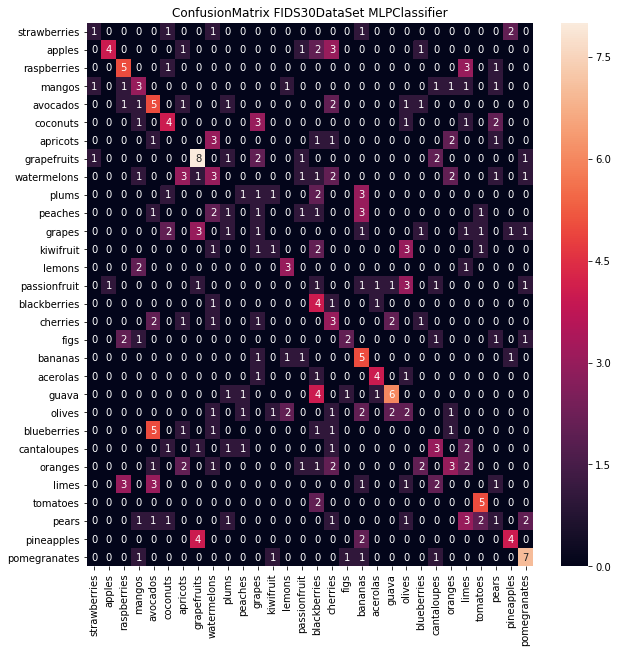

In [11]:

# mlp
exp1 = Experiment(fids30_data,  MLPClassifier(max_iter=3200, verbose=False))
exp1.train()
exp1.evaluate(figure=True)


In [12]:
exp1.evaluate(text=True)

classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=3200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False):
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.80      0.33      0.47        12
           2       0.42      0.50      0.45        10
           3       0.27      0.30      0.29        10
           4       0.26      0.38      0.31        13
           5       0.36      0.33      0.35        12
           6       0.00      0.00      0.00         9
           7       0.44      0.50      0.47        16
    

### Visual Bag of Words

We repeat the experiments but instead of extracting histogram data from the images we extract Visual Descriptors. We then use this data to train different classifiers. As with traditional Histograms, BOV also counts the frequency of descriptors. As a parameter we can set the amount of descriptors we use to describe an image.

In [ ]:
# prepare dataset with bov features
fids30_data.resetFeatures()
fids30_data.addFeatures(BOV(20))


/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


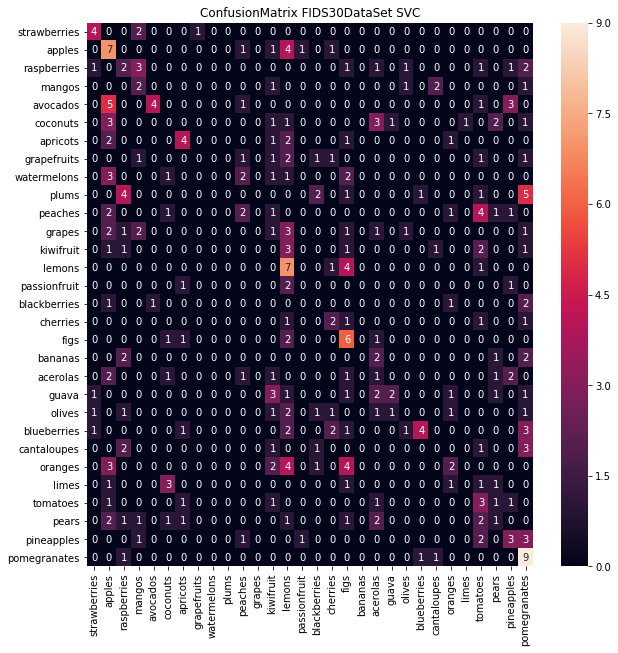

In [15]:

# svc
exp1 = Experiment(fids30_data,  svm.SVC())
exp1.train()
exp1.evaluate(figure=True)


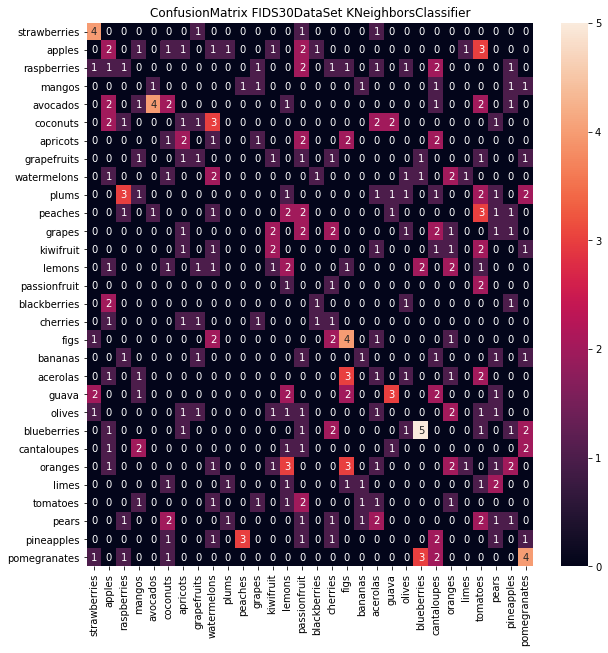

In [16]:

# knn
exp1 = Experiment(fids30_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'))
exp1.train()
exp1.evaluate(figure=True)


/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


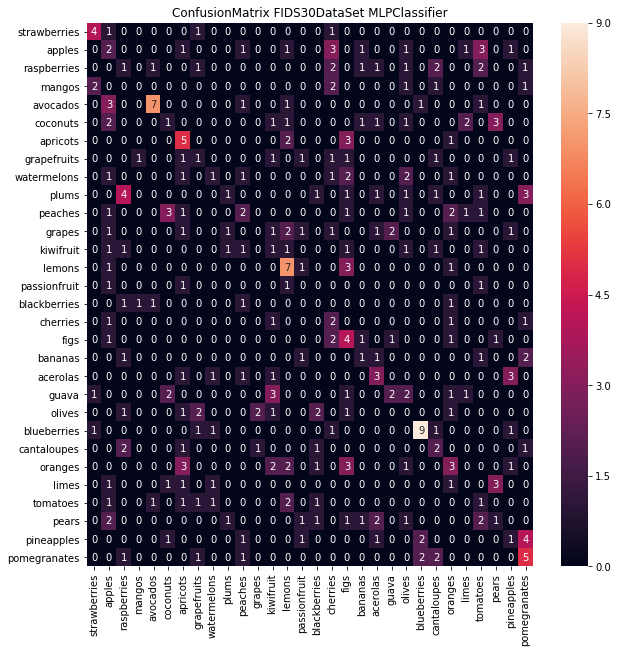

In [17]:

# mlp
exp1 = Experiment(fids30_data, MLPClassifier(max_iter=3200, verbose=False))
exp1.train()
exp1.evaluate(figure=True, text=True)


In [ ]:
### deep convolutional neural network

TODO

## Cars Data Set
   
The Cars Dataset contains Monochrome images. We classify these images wether there is a car in them or no car.   

In [2]:
# prepare the car dataset with histogram features
#datapath = "/home/lazafi/labor/ml-2019/male2019/3/data/CarData"
car_data = CarDataSet()
car_data.loadImages("/home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages")
car_data.loadImages("/home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages", "neg")
print(car_data.count)


neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-212.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-55.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-125.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-41.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-482.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-251.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-98.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-351.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-305.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-184.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-144.pgm (40, 100)
neg: /home/la

pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-491.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-217.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-163.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-130.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-427.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-170.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-327.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-488.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-436.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-381.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-186.pgm (40, 100)
neg: /home

neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-125.pgm (110, 189)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-68.pgm (146, 229)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-87.pgm (137, 206)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-62.pgm (100, 147)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-133.pgm (96, 174)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-54.pgm (107, 157)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-98.pgm (128, 228)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-13.pgm (195, 260)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-50.pgm (116, 170)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-57.pgm (136, 206)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages/test-135.pgm (119, 188)
neg: /ho

### Histogram Data

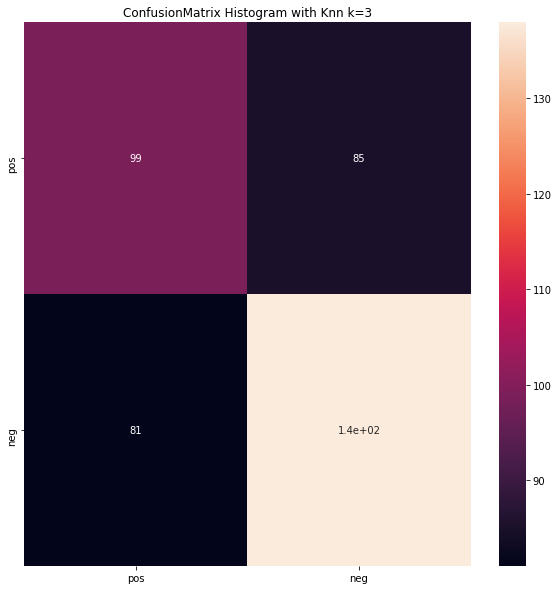

classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.55      0.54      0.54       184
           1       0.62      0.63      0.62       219

    accuracy                           0.59       403
   macro avg       0.58      0.58      0.58       403
weighted avg       0.59      0.59      0.59       403




In [3]:
car_data.addFeatures(Histogram(10))

# knn
exp1 = Experiment(car_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'),  "Histogram with Knn k=3")
exp1.train()
exp1.evaluate(figure=True, text=True)


/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       184
           1       0.63      0.63      0.63       219

    accuracy                           0.60       403
   macro avg       0.60      0.60      0.60       403
weighted avg       0.60      0.60      0.60       403




/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


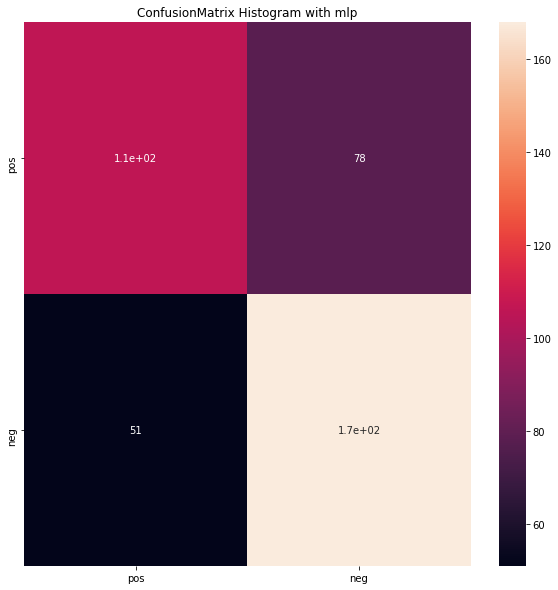

classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.68      0.58      0.62       184
           1       0.68      0.77      0.72       219

    accuracy                           0.68       403
   macro avg       0.68      0.67      0.67       403
weighted avg       0.68      0.68      0.68       403




In [4]:
# knn
exp1 = Experiment(car_data, svm.SVC(),  "Histogram with svm")
exp1.train()
exp1.evaluate(text=True)

exp1 = Experiment(car_data, MLPClassifier(max_iter=3200, verbose=False),  "Histogram with mlp")
exp1.train()
exp1.evaluate(text=True, figure=True)


### Visual Bag of Words

skipping img size (40, 100)


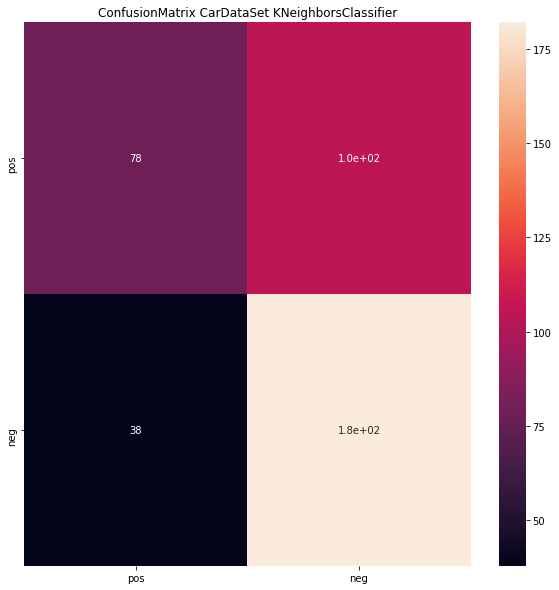

classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.67      0.43      0.52       183
           1       0.63      0.83      0.72       220

    accuracy                           0.65       403
   macro avg       0.65      0.63      0.62       403
weighted avg       0.65      0.65      0.63       403




/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


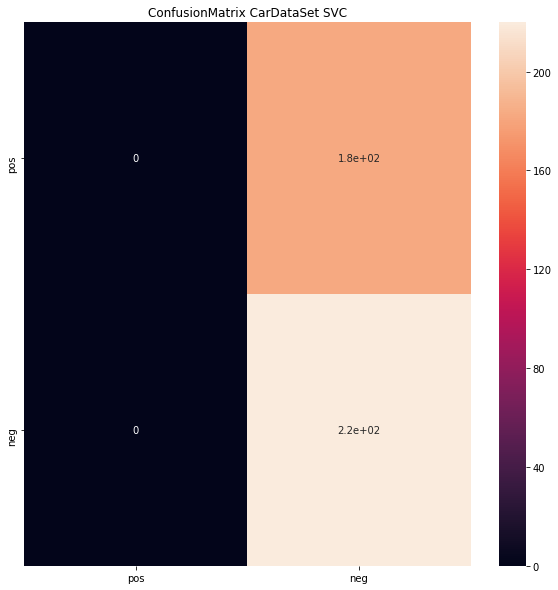

/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       183
           1       0.55      1.00      0.71       220

    accuracy                           0.55       403
   macro avg       0.27      0.50      0.35       403
weighted avg       0.30      0.55      0.39       403




/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


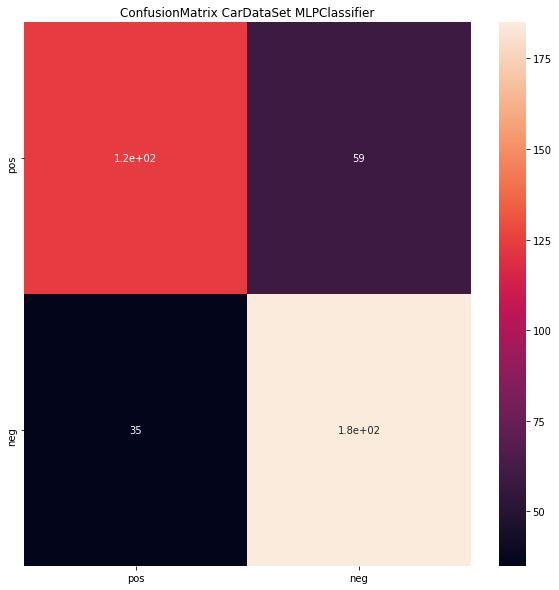

classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       183
           1       0.76      0.84      0.80       220

    accuracy                           0.77       403
   macro avg       0.77      0.76      0.76       403
weighted avg       0.77      0.77      0.76       403




In [7]:
car_data.resetFeatures()
car_data.addFeatures(BOV(20, debug=False))

# knn
exp1 = Experiment(car_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'))
exp1.train()
exp1.evaluate(figure=True, text=True)

# svm
exp1 = Experiment(car_data, svm.SVC())
exp1.train()
exp1.evaluate(figure=True, text=True)

# mlp
exp1 = Experiment(car_data, MLPClassifier())
exp1.train()
exp1.evaluate(figure=True, text=True)


10
skipping img size (40, 100)
20
skipping img size (40, 100)
30
skipping img size (40, 100)
40
skipping img size (40, 100)
[0.7067094545829467, 0.7476772239618089, 0.8222427129757697, 0.786209417221214]


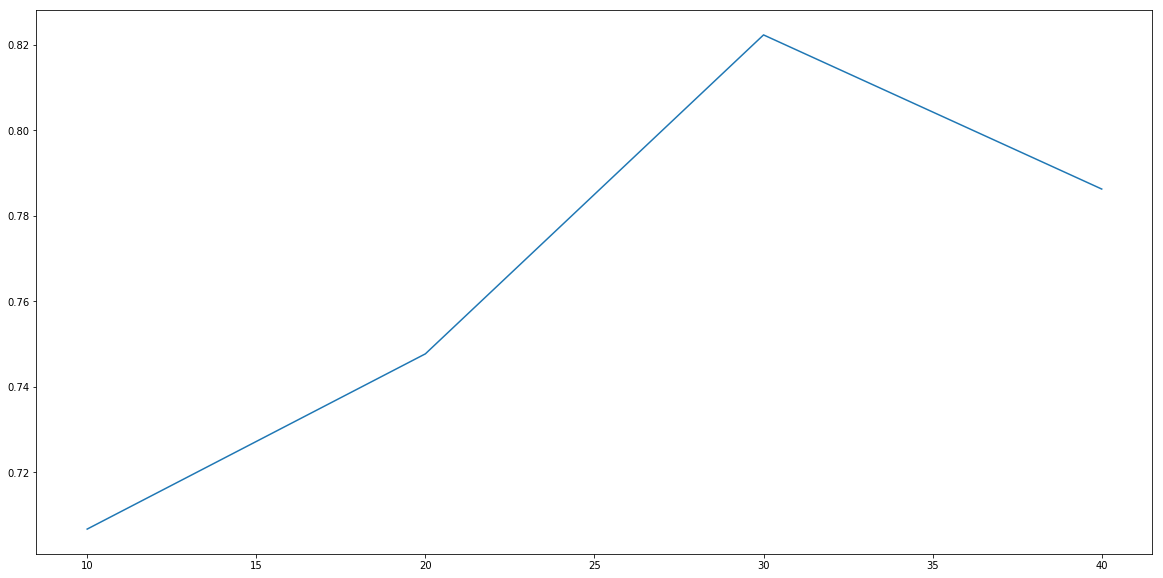

In [11]:
score = []
xrange = range(10, 50, 10)
for h in xrange:
    print(h)
    car_data.resetFeatures()
    car_data.addFeatures(BOV(h))
    exp = Experiment(car_data, MLPClassifier(max_iter=3200, verbose=False),  "BOV(%d)" % h)
    exp.train()
    score.append(exp.precision())
print(score)
plt.figure(figsize=(20,10))
plt.plot(xrange, score)
plt.show()

## CNN

In [3]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization

def createMyModel():
    
    model = Sequential()

    n_filters = 16
    # this applies n_filters convolution filters of size 5x5 resp. 3x3 each in the 2 layers below

    # Layer 1
    model.add(Convolution2D(n_filters, 3, 3, border_mode='valid', input_shape=input_shape))
    # input shape: 100x100 images with 3 channels -> input_shape should be (3, 100, 100) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))  # ReLu activation
    model.add(MaxPooling2D(pool_size=(2, 2))) # reducing image resolution by half
    model.add(Dropout(0.3))  # random "deletion" of %-portion of units in each batch

    # Layer 2
    model.add(Convolution2D(n_filters, 3, 3))  # input_shape is only needed in 1st layer
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten()) # Note: Keras does automatic shape inference.
    
    # Full Layer
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(1,activation='sigmoid'))
    
    return model


car_data = CarDataSet()
car_data.loadImages("/home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages")
car_data.loadImages("/home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages", "neg")
(df_train, df_test) = car_data.getDataFrames()

datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_it = datagen.flow_from_dataframe(df_train, batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_dataframe(df_test, batch_size=64, target_size=(224, 224))

model = createMyModel()

# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))



/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 818 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 403 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)
W0807 17:25:10.374966 139997112182528 deprecation_wrapper.py:119] From /home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



loaded neg:500 pos:551
loaded neg:670 pos:551
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


NameError: name 'input_shape' is not defined